### Section Notes

In this section, we will be testing our baseline models and evaulate their performance on the dataset after feature engineering

### Setting up

In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Helper method
# You may consider changeing the colour scheme in practice

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Loading Data 

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/train_normalised.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ST4248 Project/dataset/test_normalised.csv')

In [5]:
X_train = df_train.drop("is_canceled", axis = 1)
y_train = df_train["is_canceled"]

X_test = df_test.drop("is_canceled", axis = 1)
y_test = df_test["is_canceled"]

### Testing on models

In [ ]:
# empty dataframe for storing performance matrics
metrics = pd.DataFrame(np.zeros(shape = (5, 4)))
metrics.columns = ['models', 'accuracy', 'f1 score', 'precision']

#### Logistic Regression

--------LR-------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Correctly classified instances: 27675
Accuracy Score is 0.7879
Recall Score is 0.53543
Precision Score is 0.8466
F1 Score is 0.65598
       0     1
0  20572  1287
1   6163  7103
[[20572  1287]
 [ 6163  7103]]


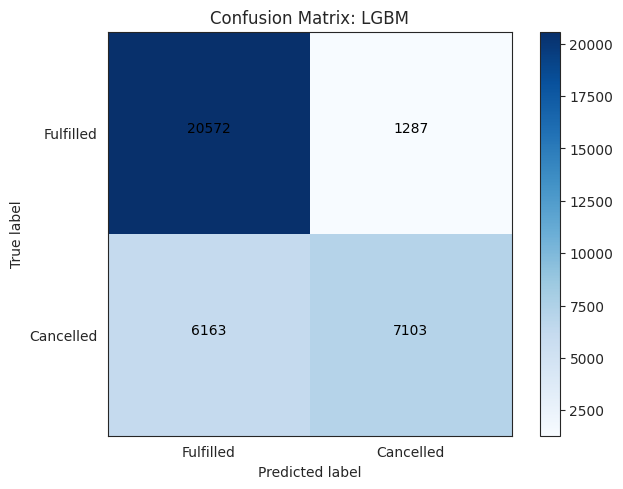

In [ ]:
print("--------LR-------")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100,random_state=42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)

y_predict_fixed = np.logical_not(y_predict)
y_test_fixed = np.logical_not(y_test)

y_predict_fixed = y_predict_fixed.astype(int)
y_test_fixed = y_test_fixed.astype(int)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: LR')

metrics.iloc[0,:] = ['LGBM',accuracy_score(y_test, y_predict), f1_score(y_test, y_predict), precision_score(y_test,y_predict)]

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

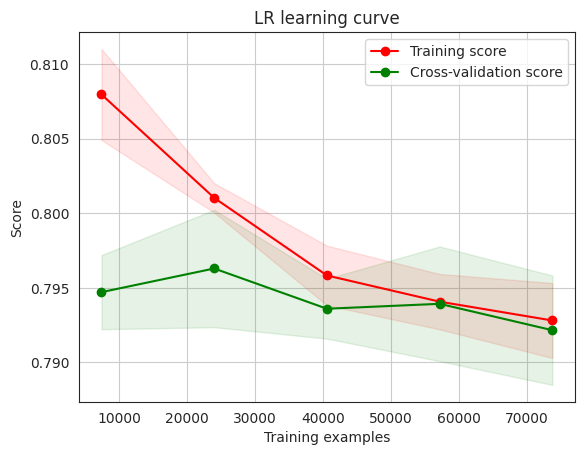

In [ ]:
plot_learning_curve(LogisticRegression(C=100,random_state=42), "LR learning curve", X_train, y_train, cv= 10, n_jobs=4)

#### Decision Tree

--------Decision Tree--------
Correctly classified instances: 28856
Accuracy Score is 0.82152
Recall Score is 0.7682
Precision Score is 0.76137
F1 Score is 0.76477
       0      1
0  18665   3194
1   3075  10191
[[18665  3194]
 [ 3075 10191]]


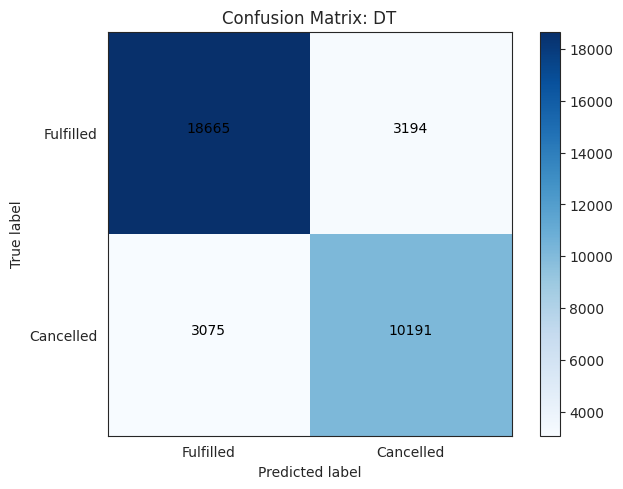

In [ ]:
print("--------Decision Tree--------")
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)

model_dt.fit(X_train, y_train)

y_predict = model_dt.predict(X_test)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: DT')

metrics.iloc[0,:] = ['DT',accuracy_score(y_test, y_predict), f1_score(y_test, y_predict), precision_score(y_test,y_predict)]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

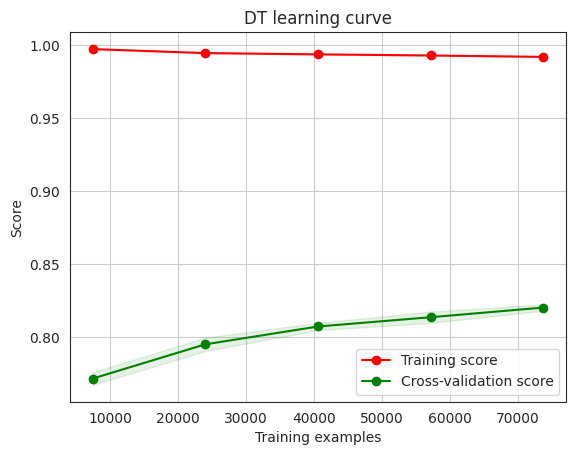

In [ ]:
plot_learning_curve(DecisionTreeClassifier(random_state = 42), "DT learning curve", X_train, y_train, cv= 10, n_jobs=4)
# start overfitting at a very early stage

#### Random Forest

--------RF--------
Correctly classified instances: 30323
Accuracy Score is 0.86329
Recall Score is 0.77069
Precision Score is 0.85314
F1 Score is 0.80982
       0      1
0  20099   1760
1   3042  10224
[[20099  1760]
 [ 3042 10224]]


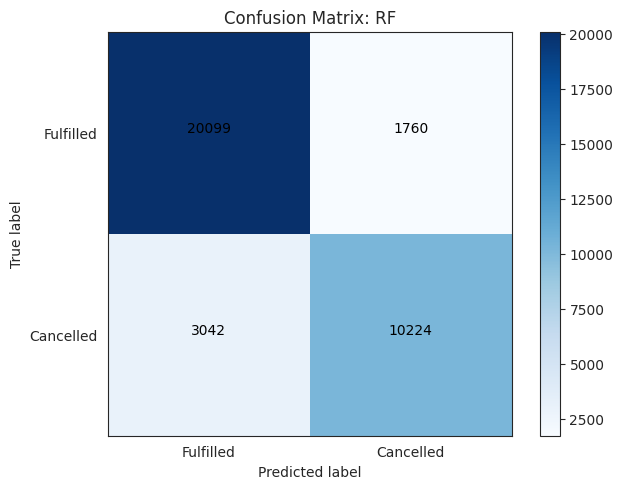

In [ ]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: RF')

metrics.iloc[0,:] = ['RF',accuracy_score(y_test, y_predict), f1_score(y_test, y_predict), precision_score(y_test,y_predict)]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

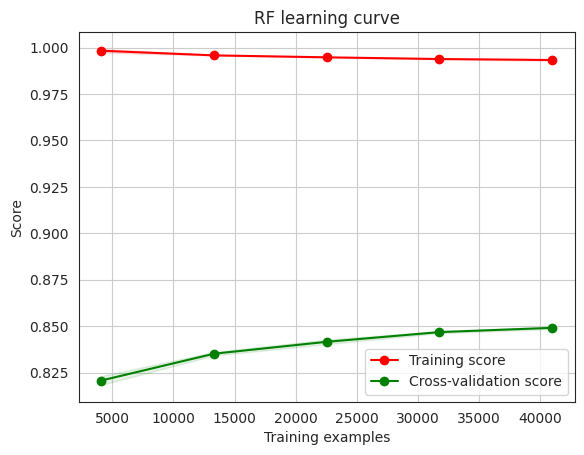

In [ ]:
plot_learning_curve(RandomForestClassifier(random_state = 42), "RF learning curve", X_train, y_train, cv= 2, n_jobs=8) # decreased fold number due to long computati

#### LightGBM and XGBoost

--------LGBM--------


/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Correctly classified instances: 29437
Accuracy Score is 0.83806
Recall Score is 0.70481
Precision Score is 0.84068
F1 Score is 0.76677
       0     1
0  20087  1772
1   3916  9350
[[20087  1772]
 [ 3916  9350]]


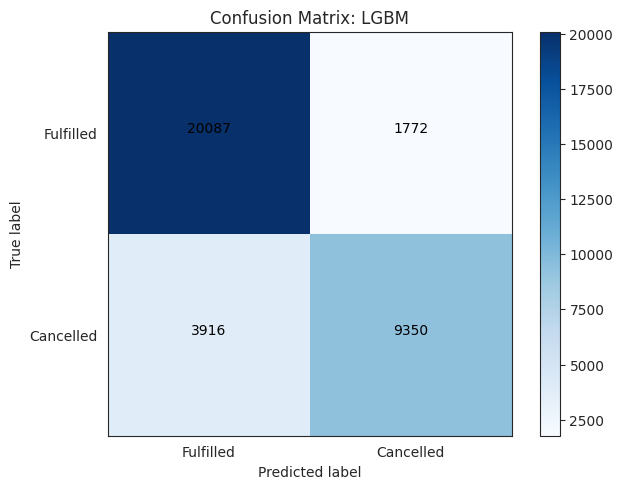

In [ ]:
print("--------LGBM--------")
import lightgbm as lgb
model = lgb.LGBMClassifier(random_state = 42)
model.fit(X_train, y_train,
          categorical_feature=[0, 2, 3, 5, 6, 7, 10, 11, 13, 15, 21, 22]
          )


y_predict = model.predict(X_test)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: LGBM')

metrics.iloc[0,:] = ['LGBM',accuracy_score(y_test, y_predict), f1_score(y_test, y_predict), precision_score(y_test,y_predict)]

--------XGBoost--------
Correctly classified instances: 29653
Accuracy Score is 0.84421
Recall Score is 0.71453
Precision Score is 0.84907
F1 Score is 0.77601
       0     1
0  20174  1685
1   3787  9479
[[20174  1685]
 [ 3787  9479]]


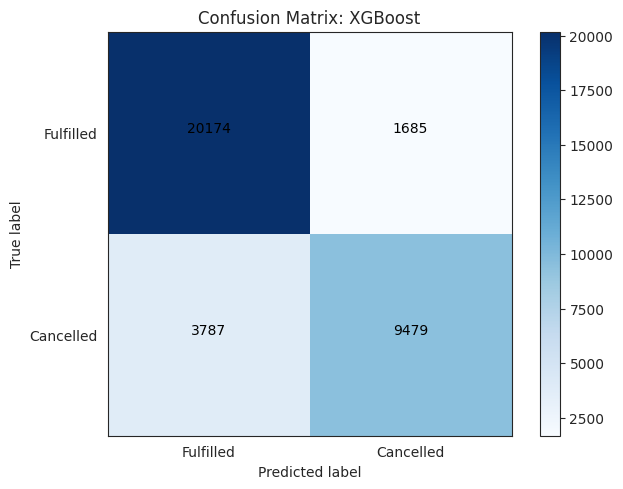

In [ ]:
print("--------XGBoost--------")
xgb = XGBClassifier(booster = 'gbtree', seed = 42)
xgb.fit(X_train, y_train)

y_predict = xgb.predict(X_test)

print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['Fulfilled','Cancelled']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Confusion Matrix: XGBoost')

### SVM

Correctly classified instances: 27717
Accuracy Score is 0.7891
Recall Score is 0.48402
Precision Score is 0.91939
F1 Score is 0.63417
       0     1
0  21296   563
1   6845  6421
[[0.97424402 0.02575598]
 [0.5159807  0.4840193 ]]


NameError: ignored

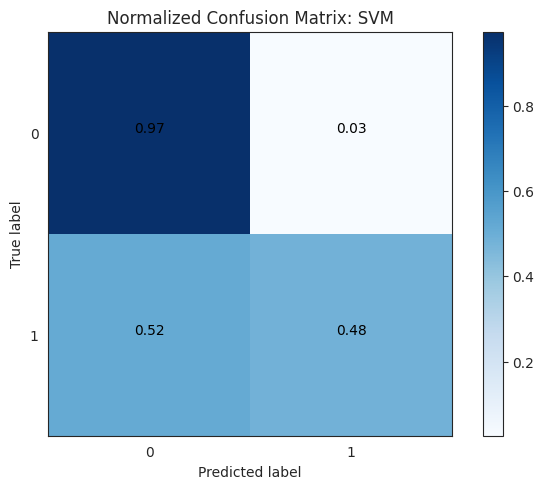

In [7]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', C = 10.0)
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = True, 
                      title='Normalized Confusion Matrix: SVM')

lightGBM_matrix = pd.DataFrame(confusion_matrix(y_test,y_predict))

[[21296   563]
 [ 6845  6421]]


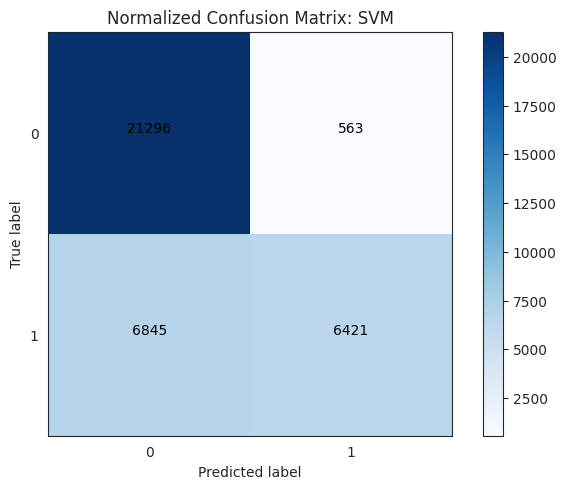

In [8]:
sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: SVM')

lightGBM_matrix = pd.DataFrame(confusion_matrix(y_test,y_predict))

### experimenting with merging deposit-type into 2 levels. only (0 for no deposit, and 1 for deposit)

In [ ]:
X_train.deposit_type = X_train.deposit_type.apply(func = (lambda x: 1 if (x != 0) else 0))
X_test.deposit_type = X_test.deposit_type.apply(func = (lambda x: 1 if (x != 0) else 0))


--------LR-------


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


27732
Correctly classified instances: 27732
Accuracy Score is 0.78952
Recall Score is 0.52812
Precision Score is 0.86079
F1 Score is 0.65461
       0     1
0  20726  1133
1   6260  7006
[[20726  1133]
 [ 6260  7006]]


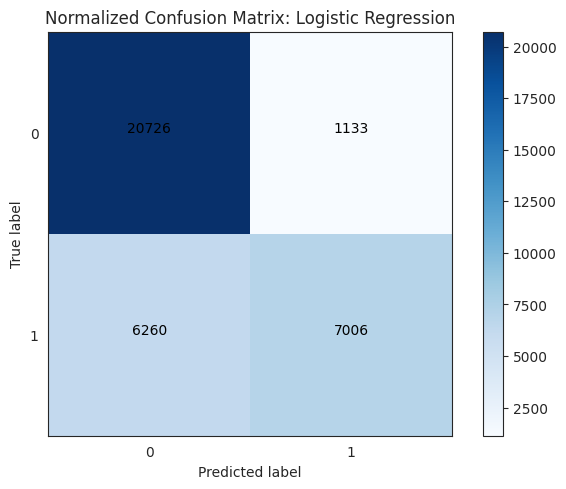

In [ ]:
print("--------LR-------")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,random_state=42)
lr.fit(X_train, y_train)


y_predict = lr.predict(X_test)
print(sum(y_predict == y_test))
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: Logistic Regression')

--------Decision Tree--------
Correctly classified instances: 28856
Accuracy Score is 0.82152
Recall Score is 0.76828
Precision Score is 0.76134
F1 Score is 0.76479
       0      1
0  18664   3195
1   3074  10192
[[18664  3195]
 [ 3074 10192]]


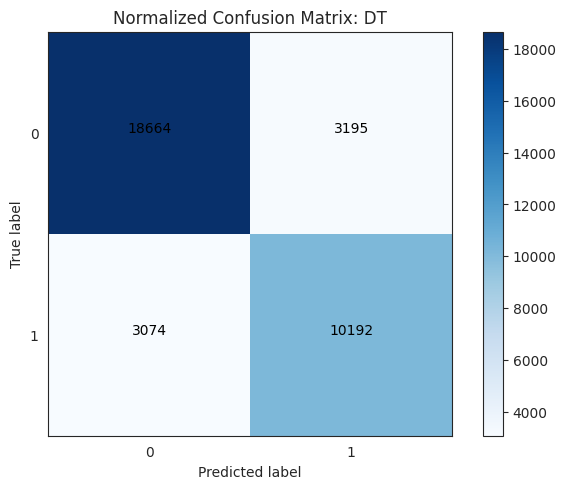

In [ ]:
print("--------Decision Tree--------")
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 42)

model_dt.fit(X_train, y_train)

y_predict = model_dt.predict(X_test)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: DT')

--------RF--------
30331
Correctly classified instances: 30331
Accuracy Score is 0.86352
Recall Score is 0.77024
Precision Score is 0.85406
F1 Score is 0.80999
       0      1
0  20113   1746
1   3048  10218
[[20113  1746]
 [ 3048 10218]]


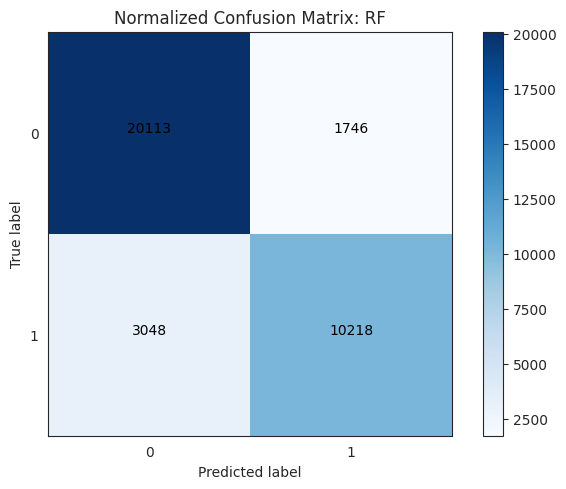

In [ ]:
print("--------RF--------")
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)


y_predict = rf.predict(X_test)
print(sum(y_predict == y_test))
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: RF')

--------LGBM--------


/usr/local/lib/python3.9/dist-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Correctly classified instances: 28456
Accuracy Score is 0.81014
Recall Score is 0.64202
Precision Score is 0.81604
F1 Score is 0.71864
       0     1
0  19939  1920
1   4749  8517
[[19939  1920]
 [ 4749  8517]]


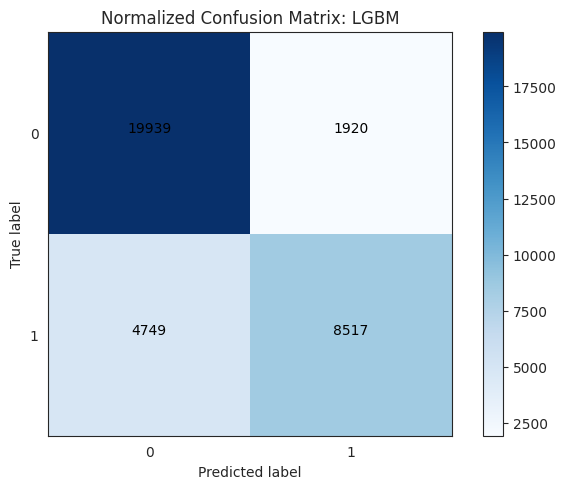

In [ ]:
print("--------LGBM--------")
import lightgbm as lgb
lightgbm = lgb.LGBMClassifier(random_state = 42)
lightgbm.fit(X_train, y_train
          , categorical_feature=[6,10,14,15,16,17,18,19,20,23,24]
          )


y_predict = lightgbm.predict(X_test)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: LGBM')

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster = 'gbtree')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XGBoost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of XGBoost Classifier is : 0.8442135231316726
Confusion Matrix : 
[[20174  1685]
 [ 3787  9479]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     21859
           1       0.85      0.71      0.78     13266

    accuracy                           0.84     35125
   macro avg       0.85      0.82      0.83     35125
weighted avg       0.84      0.84      0.84     35125



Correctly classified instances: 29296
Accuracy Score is 0.83405
Recall Score is 0.67534
Precision Score is 0.85478
F1 Score is 0.75454
       0     1
0  20337  1522
1   4307  8959
[[20337  1522]
 [ 4307  8959]]


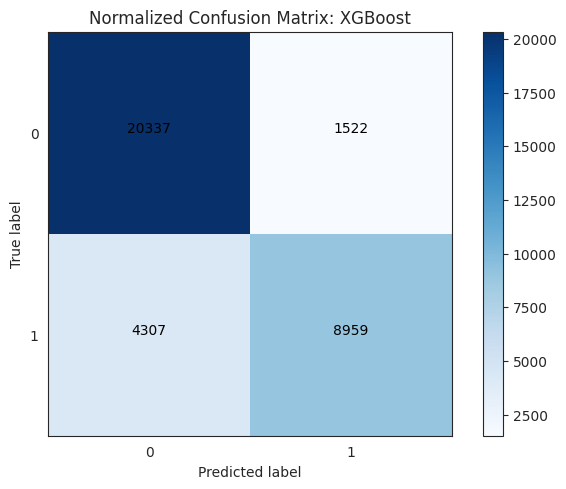

In [ ]:
y_predict = xgb.predict(X_test)
print(f'Correctly classified instances: {sum(y_predict == y_test)}')
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

sns.set_style('white') 
class_names = ['0','1']
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      classes= class_names, normalize = False, 
                      title='Normalized Confusion Matrix: XGBoost')

In [ ]:
from sklearn.ensemble import VotingClassifier
classifiers = [('light GBM', lightgbm), ('decision tree', model_dt), ('random forest', rf),  ('XGBoost', xgb)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('light GBM', LGBMClassifier(random_state=42)),
                             ('decision tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('random forest',
                              RandomForestClassifier(random_state=42)),
                             ('XGBoost',
                              XGBClassifier(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=...
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=180, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [ ]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

print(f"Accuracy Score of combined voting Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of combined voting Classifier is : 0.8431886120996441
Confusion Matrix : 
[[20742  1117]
 [ 4391  8875]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88     21859
           1       0.89      0.67      0.76     13266

    accuracy                           0.84     35125
   macro avg       0.86      0.81      0.82     35125
weighted avg       0.85      0.84      0.84     35125



### experimenting whether is_aviation could help prediction (but aviation only consists of 229 entries, is it worth isolating?

In [ ]:
X_train.loc[X_train["market_segment"]==0].shape

(169, 23)

### PCA, trying to visualise why linear models does not perform well

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
pca.fit(X_train)

PCA(n_components=8)

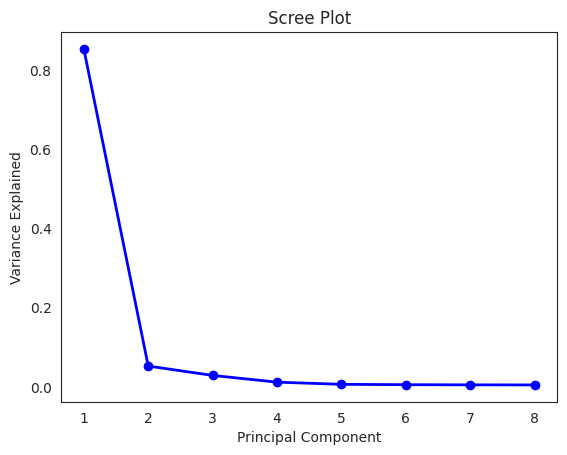

In [ ]:
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
# we choose 3 principal components

In [ ]:
pca = PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [ ]:
X_pca = pca.transform(X_train)
print(X_train.shape)
print(X_pca.shape)

(81957, 23)
(81957, 3)


In [ ]:
fig = plt.figure(figsize = (120,120))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[0:1000, 0], X_pca[0:1000, 1], X_pca[0:1000, 2], alpha=0.8, c = y_train[0:1000], s = 100)
ax.axis('equal');

Output hidden; open in https://colab.research.google.com to view.